<a href="https://colab.research.google.com/github/j-winfield/fastaidl/blob/pet-classification/petclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate


In [0]:
bs=64

In [9]:
path =untar_data(URLs.PETS);path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [10]:
path.ls()


[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno=path/'annotations'
path_image=path/'images'

In [0]:
fnames=get_image_files(path_image)

In [13]:
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_132.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_254.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_36.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_122.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_193.jpg')]

In [0]:
np.random.seed(2)
              

In [0]:
pat=r'/([^/]+)_\d+.jpg$'

In [0]:
data=ImageDataBunch.from_name_re(path_image,fnames,pat,ds_tfms=get_transforms(),size=224,bs=bs).normalize(imagenet_stats)

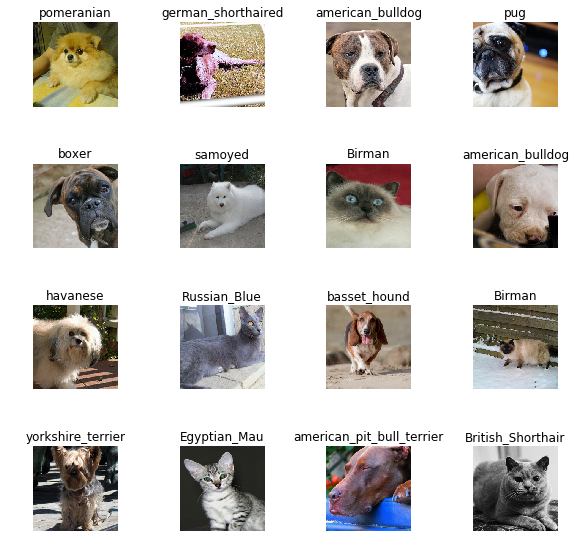

In [17]:
data.show_batch(figsize=(8,8),rows=4)

In [18]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 103113000.76it/s]


In [19]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.392843,0.342108,0.104871,01:39
1,0.565361,0.259799,0.087280,01:39
2,0.329117,0.227900,0.075778,01:40
3,0.249522,0.223215,0.073748,01:41


In [0]:
learn.save('stage1')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)


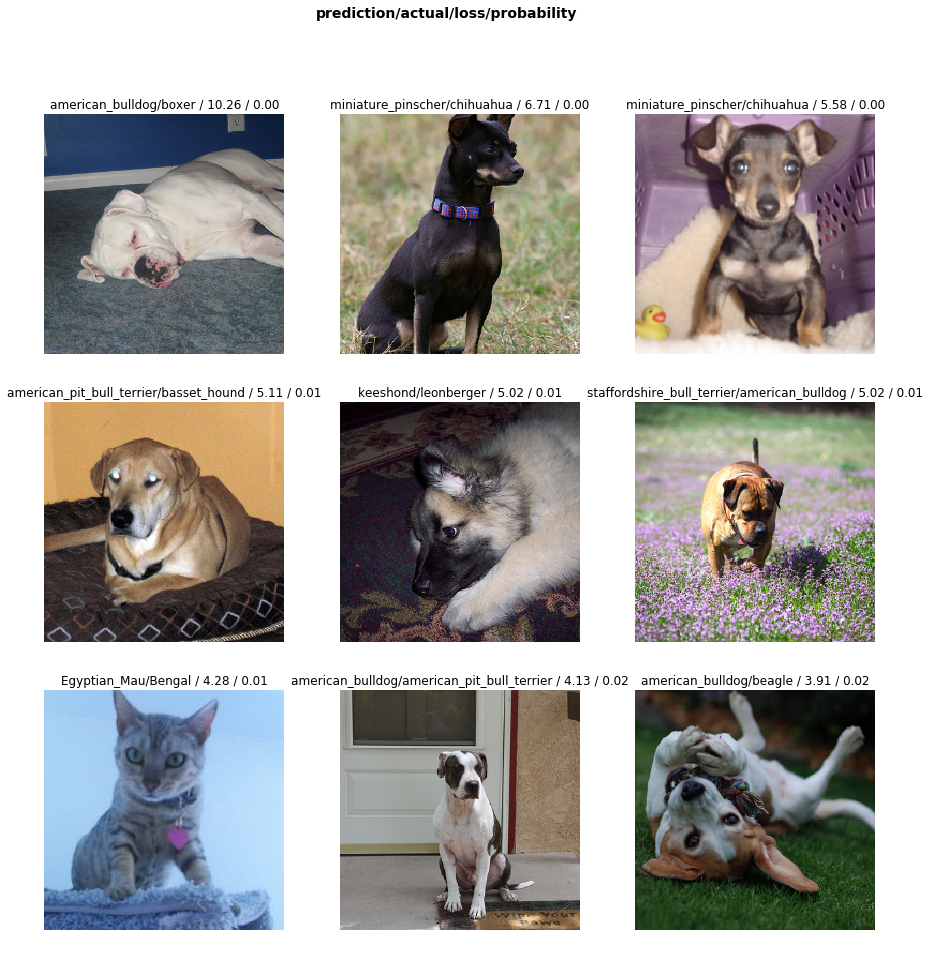

In [25]:
interp.plot_top_losses(9,figsize=(15,15))

In [31]:
interp.most_confused(min_val=2)

[('Bengal', 'Egyptian_Mau', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Ragdoll', 'Birman', 4),
 ('Siamese', 'Birman', 4),
 ('boxer', 'american_bulldog', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Maine_Coon', 'Bengal', 3),
 ('american_bulldog', 'boxer', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('Abyssinian', 'Russian_Blue', 2),
 ('Birman', 'Siamese', 2),
 ('Persian', 'Maine_Coon', 2),
 ('Ragdoll', 'Siamese', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
 learn.unfreeze()

In [33]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.518361,0.368623,0.121786,01:46


In [34]:
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
havanese,Maine_Coon,wheaten_terrier,basset_hound,yorkshire_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
miniature_pinscher,shiba_inu,Egyptian_Mau,Ragdoll,saint_bernard
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


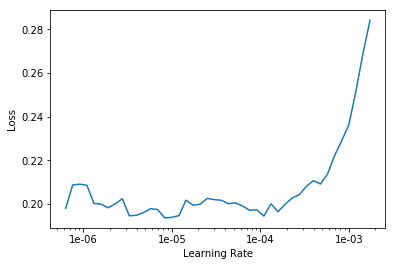

In [37]:
learn.recorder .plot()

In [0]:
learn.unfreeze()

In [40]:
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.235039,0.222489,0.076455,01:45
1,0.189432,0.209423,0.071042,01:44


In [41]:
learn=cnn_learner(data,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 107924993.40it/s]


In [42]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.916660,0.313015,0.113667,02:08
1,0.425170,0.326919,0.117050,02:01
2,0.281126,0.236465,0.075101,02:00
3,0.189182,0.203265,0.073072,01:59
4,0.137627,0.200612,0.074425,02:01


In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


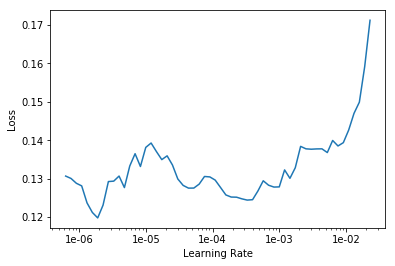

In [44]:
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(2,max_lr=slice(1e-06,1e-05))

epoch,train_loss,valid_loss,error_rate,time
0,0.118993,0.199974,0.069689,02:02
1,0.121344,0.196428,0.071042,01:59


In [0]:
learn.save('stage2')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

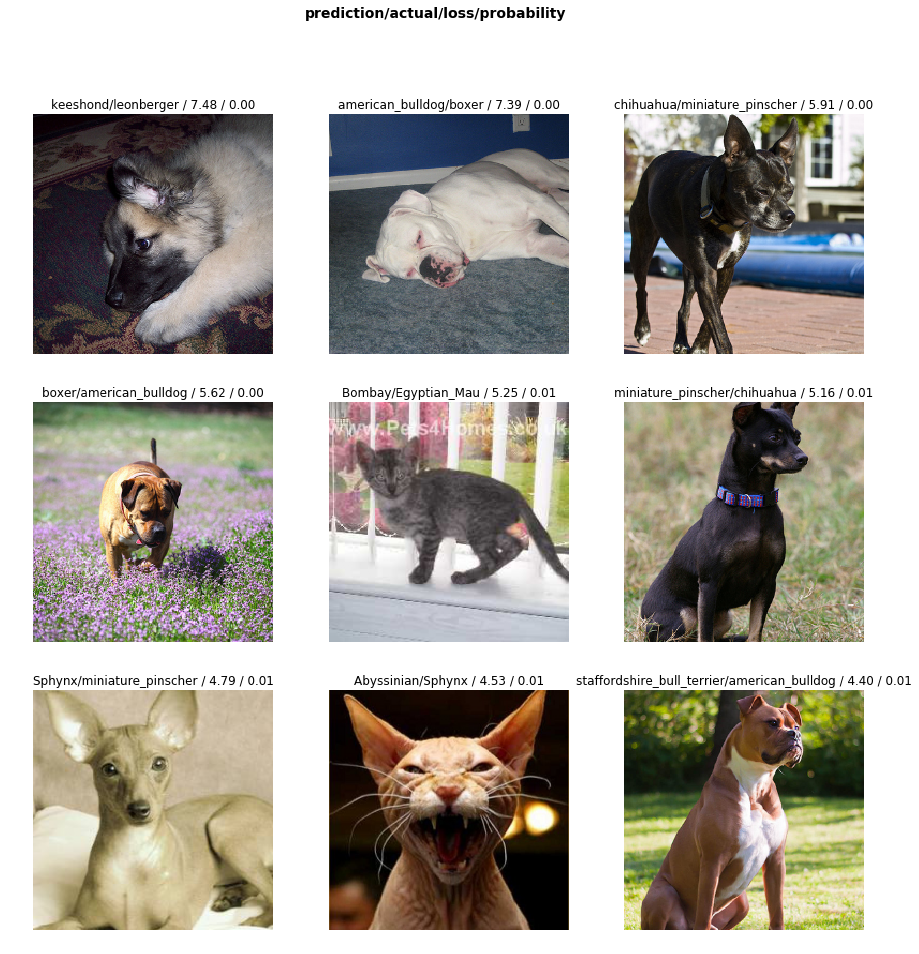

In [48]:
interp.plot_top_losses(9,figsize=(15,15))

In [51]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 10),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Bengal', 'Egyptian_Mau', 6),
 ('Siamese', 'Birman', 5),
 ('chihuahua', 'miniature_pinscher', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('american_bulldog', 'boxer', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'german_shorthaired', 3),
 ('boxer', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Abyssinian', 'Egyptian_Mau', 2),
 ('Abyssinian', 'Russian_Blue', 2),
 ('Birman', 'Siamese', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

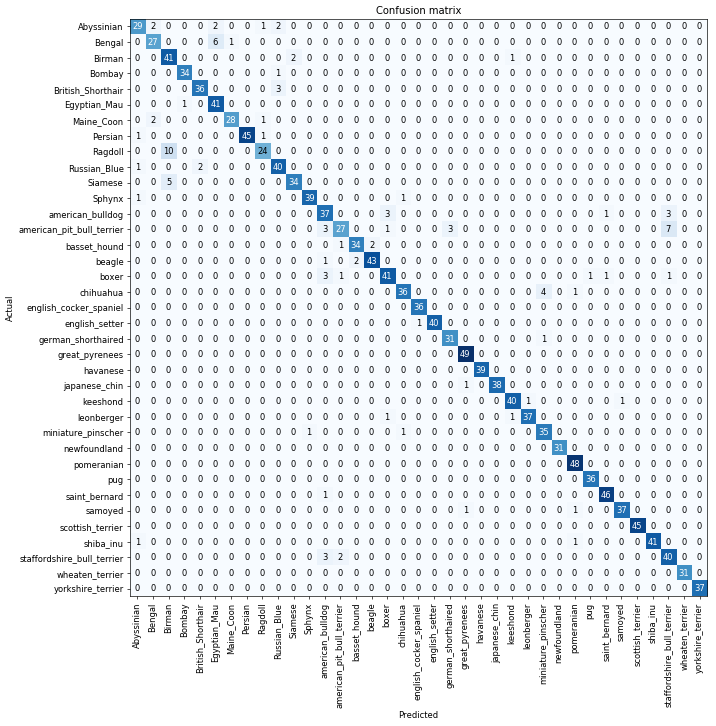

In [53]:
interp.plot_confusion_matrix(dpi=60,figsize=(12,12))